In [47]:
import pandas as pd

data = pd.read_csv("dds_datasets\\nyt1.csv")
age_groups = ["<18", "18-24", "25-34", "35-44", "45-54", "55-64", "65+"]
data


,Age,Gender,Impressions,Clicks,Signed_In
0,36,0,3,0,1
1,73,1,3,0,1
2,30,0,3,0,1
3,49,1,3,0,1
4,47,1,11,0,1
...,...,...,...,...,...
458436,0,0,2,0,0
458437,0,0,4,0,0
458438,72,1,5,0,1
458439,0,0,5,0,0


In [48]:
data.Age.unique()

array([ 36,  73,  30,  49,  47,   0,  46,  16,  52,  21,  57,  31,  40,
        38,  59,  61,  48,  29,  19,  23,  66,  44,  32,  22,  74,  65,
        63,  35,  33,  34,  43,  18,  17,  62,  27,  11,  42,  41,  14,
        64,  24,  26,  39,  71,  45,  28,  83,  79,  67,  51,  60,  58,
        53,  25,  50,  76,  15,  78,  55,  37,  56,  77,  85,  82,  13,
        70,  84,  54,  20,  10,  81,  68,  72,  69,  87,  80,  88,  12,
        86,  75,  89,   9,  96, 102,  98,  90,  99,  91,  92,  95,   8,
        94,  93,  97,   7, 100, 103, 107, 101, 108, 104], dtype=int64)

In [49]:
data.groupby("Age").count()


,Gender,Impressions,Clicks,Signed_In
Age,,,,
0,137106,137106,137106,137106
7,5,5,5,5
8,15,15,15,15
9,48,48,48,48
10,113,113,113,113
...,...,...,...,...
102,2,2,2,2
103,2,2,2,2
104,1,1,1,1


In [50]:
data[data.Age == 0].groupby("Gender").count()

,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,137106,137106,137106,137106


In [51]:
data[data.Age > 0].groupby("Gender").count()


,Age,Impressions,Clicks,Signed_In
Gender,,,,
0,153070,153070,153070,153070
1,168265,168265,168265,168265


<AxesSubplot: >

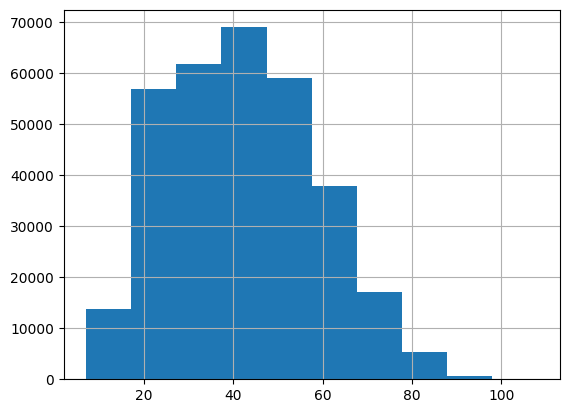

In [52]:
data_no_null_age = data[(data.Signed_In == 1) & (data.Age > 0)]
data_no_null_age
data_no_null_age.Age.hist()

In [53]:
def setAgeGroup(age):
    if (age < 18):
        return "<18"
    elif (age < 25):
        return "18-24"
    elif (age < 35):
        return "25-34"
    elif (age < 45):
        return "35-44"
    elif (age < 55):
        return "45-54"
    elif (age < 65):
        return "55-64"
    elif (age >= 65):
        return "65+"

data_no_null_age["AgeGroup"] = data_no_null_age.Age.apply(lambda x: setAgeGroup(x))

data_no_null_age

C:\Users\Asus\AppData\Local\Temp\ipykernel_16484\922734853.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_null_age["AgeGroup"] = data_no_null_age.Age.apply(lambda x: setAgeGroup(x))


,Age,Gender,Impressions,Clicks,Signed_In,AgeGroup
0,36,0,3,0,1,35-44
1,73,1,3,0,1,65+
2,30,0,3,0,1,25-34
3,49,1,3,0,1,45-54
4,47,1,11,0,1,45-54
...,...,...,...,...,...,...
458432,30,0,4,0,1,25-34
458433,21,1,2,0,1,18-24
458434,61,1,6,0,1,55-64
458435,51,0,7,0,1,45-54


<AxesSubplot: xlabel='AgeGroup'>

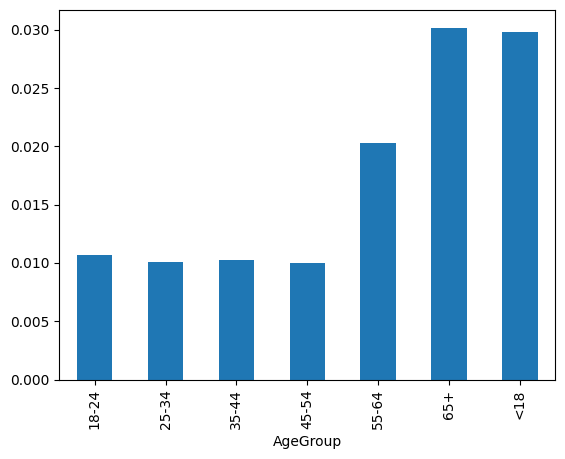

In [54]:
grouped_data = data_no_null_age.groupby("AgeGroup")
def findCTR():
    ctr_data = grouped_data[["Clicks", "Impressions"]].mean()
    ctr_data["CTR"] = ctr_data.Clicks / ctr_data.Impressions
    return ctr_data["CTR"]

ctr_data = findCTR()
ctr_data.plot(kind="bar")

<AxesSubplot: xlabel='Gender(0-male, 1-female)', ylabel='Count'>

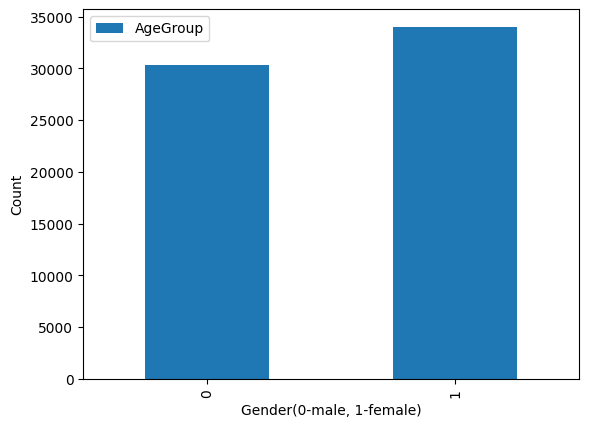

In [55]:
def genderComparison(age_group):
    genders_comparison = data_no_null_age.loc[data_no_null_age["AgeGroup"] == age_group]
    genders_comparison = genders_comparison[["AgeGroup", "Gender"]].groupby("Gender").count()
    return genders_comparison

genders = []

for i in range(len(age_groups)):
    genders.append(genderComparison(age_groups[i]))
genders[4].plot(kind='bar', xlabel="Gender(0-male, 1-female)", ylabel="Count")

<AxesSubplot: xlabel='Age Group', ylabel='Impressions mean'>

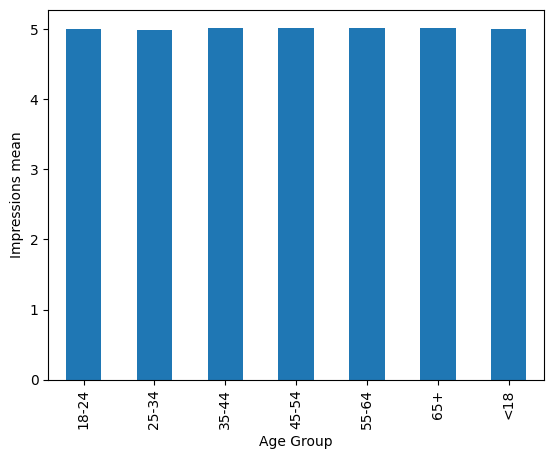

In [56]:
mean_impressions = grouped_data["Impressions"].mean()
mean_impressions.plot(kind="bar", xlabel="Age Group", ylabel="Impressions mean")

In [57]:
median_impressions = grouped_data["Impressions"].median()
median_impressions# .plot(kind="bar", xlabel="Age Group", ylabel="Impressions median")

AgeGroup
18-24    5.0
25-34    5.0
35-44    5.0
45-54    5.0
55-64    5.0
65+      5.0
<18      5.0
Name: Impressions, dtype: float64

<AxesSubplot: xlabel='Age Group', ylabel='Impressions max'>

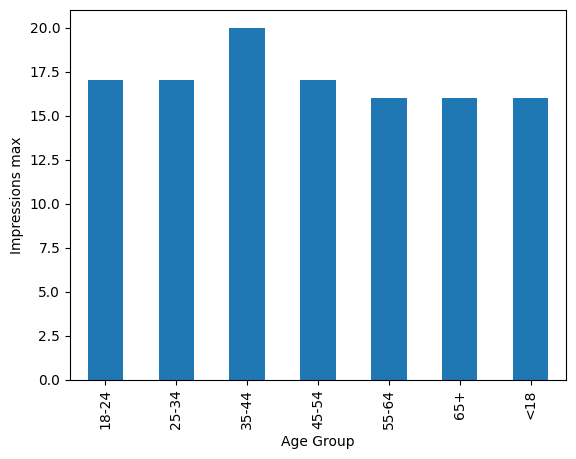

In [58]:
max_impressions = grouped_data["Impressions"].max()
max_impressions.plot(kind="bar", xlabel="Age Group", ylabel="Impressions max")


,Impressions,Median Impressions,Max Impressions,Dispersion Impressions
AgeGroup,,,,
18-24,5.002826,5.0,17,2.244950
25-34,4.993829,5.0,17,2.226877
35-44,5.021507,5.0,20,2.237829
45-54,5.010406,5.0,17,2.240790
55-64,5.022308,5.0,16,2.230206
65+,5.012347,5.0,16,2.249162
<18,5.007159,5.0,16,2.271897


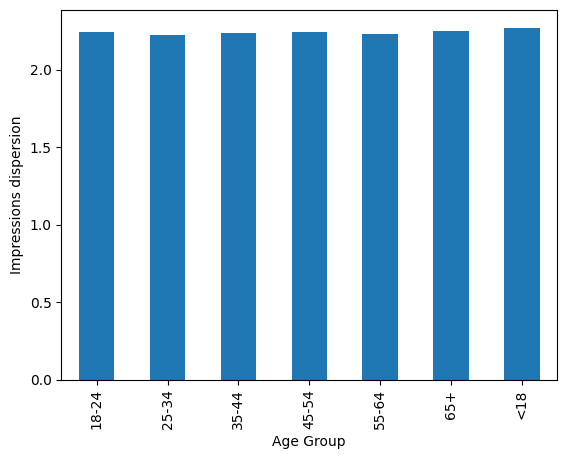

In [59]:
disp_impressions = grouped_data["Impressions"].std()
disp_impressions.plot(kind="bar", xlabel="Age Group", ylabel="Impressions dispersion")
final_data_frame = mean_impressions.to_frame()
final_data_frame["Median Impressions"] = median_impressions
final_data_frame["Max Impressions"] = max_impressions
final_data_frame["Dispersion Impressions"] = disp_impressions
final_data_frame